<a href="https://colab.research.google.com/github/filipesartori/Segmenta-oPython/blob/main/Segmenta%C3%A7%C3%A3o_em_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!cp -R /content/gdrive/MyDrive/Colab\ Notebooks/Segmentação\ Python/imagens/ imagens/

In [7]:
def mostrar(imagem):
  fig = plt.gcf()
  fig.set_size_inches(18,6)
  plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB), cmap='gray')
  plt.axis('off')
  plt.show()

**Segmentação em Clusters**

In [ ]:
img = cv2.imread('/content/imagens/frutas.jpg')
vetorizado = img.reshape((-1, 3))
vetorizado = np.float32(vetorizado)
criterio = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret, label, centros = cv2.kmeans(vetorizado, 7, None, criterio, 10, cv2.KMEANS_RANDOM_CENTERS)

In [ ]:
centros = np.uint8(centros)

In [ ]:
img_final = centros[label.flatten()]

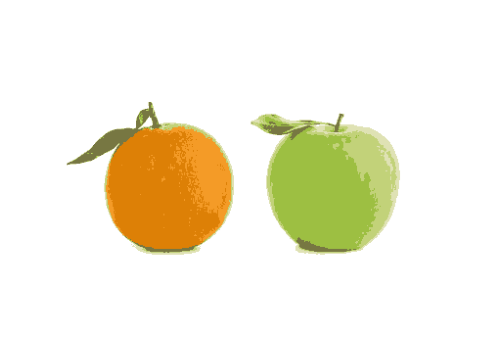

In [ ]:
img_final = img_final.reshape(img.shape)
mostrar(cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB))

In [5]:
def segmentacao_cluster(link, k):
  img = cv2.imread(link)
  vetorizado = img.reshape((-1, 3))
  vetorizado = np.float32(vetorizado)
  criterio = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
  ret, label, centros = cv2.kmeans(vetorizado, k, None, criterio, 10, cv2.KMEANS_RANDOM_CENTERS)
  centros = np.uint8(centros)
  img_final = centros[label.flatten()]
  img_final = img_final.reshape(img.shape)
  return img_final

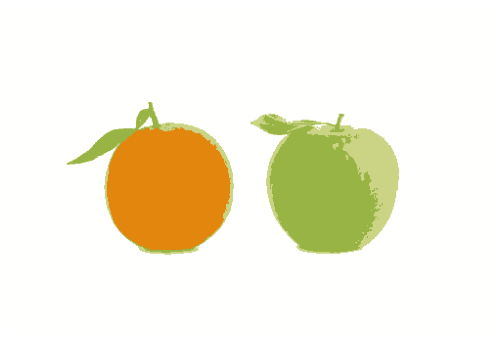

In [8]:
seg_cluster = segmentacao_cluster('/content/imagens/frutas.jpg', 4)
mostrar(seg_cluster)

In [11]:
img = cv2.imread('/content/imagens/frutas.jpg')

In [14]:
def segmentacao_clustering(link):
  img = cv2.imread(link)
  titulos = ['Imagem Original']
  imagens = [img]

  segmentacoes = 6
  for k in range(2, segmentacoes + 1):
    titulo = 'k = ' + str(k)
    titulos.append(titulo)
    seg = segmentacao_cluster(link, k)
    imagens.append(seg)
  
  fig = plt.gcf()
  fig.set_size_inches(18, 12)
  for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(cv2.cvtColor(imagens[i], cv2.COLOR_BGR2RGB))
    plt.title(titulos[i])
    plt.xticks([]), plt.yticks([])

  plt.subplots_adjust(wspace=0.05)
  plt.show()  

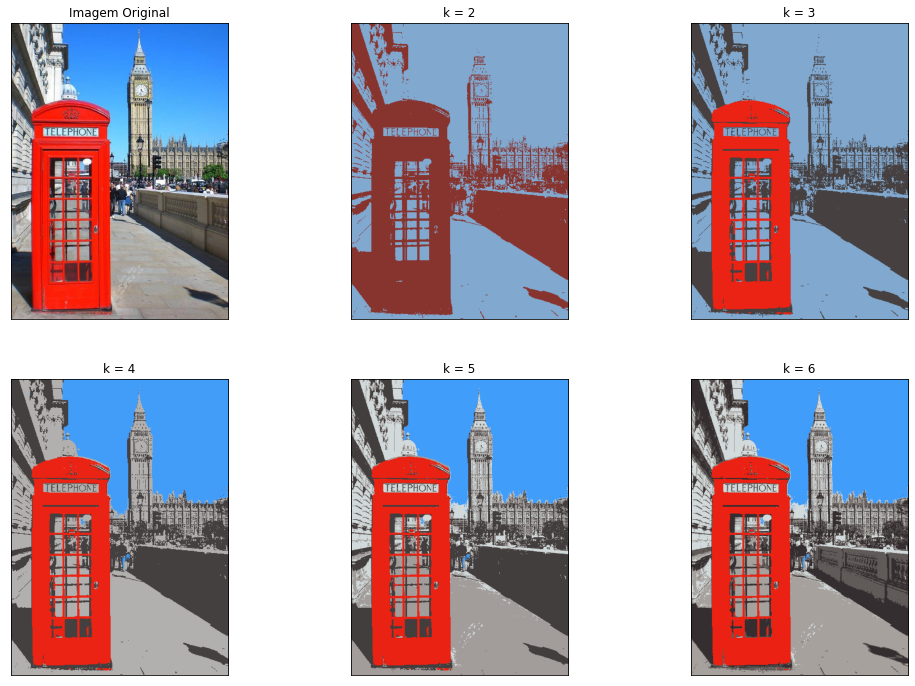

In [20]:
segmentacao_clustering('/content/imagens/london-red-phonebox.jpg')